# Module 3 Final Project - Northwind Database
### By Matt Pucci

## Questions we are looking to answer:
1. Does discount amount have statistically significant effect on quantity of a product in an order? If so, at what levels?

### We will be using the OSEMIN methodology for this project.
#### Lets import any libraries that could be of use to us in this project.

In [2]:
import sqlite3 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
from scipy import stats 
import statsmodels.api as sm 
from statsmodels.formula.api import ols
from sklearn import linear_model as lm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')  

#### Lets establish a connection to the SQL database and see what our table categories are.

In [3]:
conn = sqlite3.connect('Northwind_small.sqlite')
c = conn.cursor()

In [4]:
table_names = c.execute("SELECT name FROM sqlite_master WHERE type='table';").fetchall()
table_names 

[('Employee',),
 ('Category',),
 ('Customer',),
 ('Shipper',),
 ('Supplier',),
 ('Order',),
 ('Product',),
 ('OrderDetail',),
 ('CustomerCustomerDemo',),
 ('CustomerDemographic',),
 ('Region',),
 ('Territory',),
 ('EmployeeTerritory',)]

### In order to make exploring the data as easy as possible, lets look into all 13 tables and store the data into a Panda Dataframe (df).

## 1. Employee

In [5]:
employeedf = pd.read_sql_query('SELECT * FROM Employee;', conn)
employeedf.head(10)

,Id,LastName,FirstName,Title,TitleOfCourtesy,BirthDate,HireDate,Address,City,Region,PostalCode,Country,HomePhone,Extension,Photo,Notes,ReportsTo,PhotoPath
0,1,Davolio,Nancy,Sales Representative,Ms.,1980-12-08,2024-05-01,507 - 20th Ave. E. Apt. 2A,Seattle,North America,98122,USA,(206) 555-9857,5467,None,Education includes a BA in psychology from Col...,2.0,http://accweb/emmployees/davolio.bmp
1,2,Fuller,Andrew,"Vice President, Sales",Dr.,1984-02-19,2024-08-14,908 W. Capital Way,Tacoma,North America,98401,USA,(206) 555-9482,3457,None,Andrew received his BTS commercial in 1974 and...,NaN,http://accweb/emmployees/fuller.bmp
2,3,Leverling,Janet,Sales Representative,Ms.,1995-08-30,2024-04-01,722 Moss Bay Blvd.,Kirkland,North America,98033,USA,(206) 555-3412,3355,None,Janet has a BS degree in chemistry from Boston...,2.0,http://accweb/emmployees/leverling.bmp
3,4,Peacock,Margaret,Sales Representative,Mrs.,1969-09-19,2025-05-03,4110 Old Redmond Rd.,Redmond,North America,98052,USA,(206) 555-8122,5176,None,Margaret holds a BA in English literature from...,2.0,http://accweb/emmployees/peacock.bmp
4,5,Buchanan,Steven,Sales Manager,Mr.,1987-03-04,2025-10-17,14 Garrett Hill,London,British Isles,SW1 8JR,UK,(71) 555-4848,3453,None,Steven Buchanan graduated from St. Andrews Uni...,2.0,http://accweb/emmployees/buchanan.bmp
5,6,Suyama,Michael,Sales Representative,Mr.,1995-07-02,2025-10-17,Coventry House Miner Rd.,London,British Isles,EC2 7JR,UK,(71) 555-7773,428,None,Michael is a graduate of Sussex University (MA...,5.0,http://accweb/emmployees/davolio.bmp
6,7,King,Robert,Sales Representative,Mr.,1992-05-29,2026-01-02,Edgeham Hollow Winchester Way,London,British Isles,RG1 9SP,UK,(71) 555-5598,465,None,Robert King served in the Peace Corps and trav...,5.0,http://accweb/emmployees/davolio.bmp
7,8,Callahan,Laura,Inside Sales Coordinator,Ms.,1990-01-09,2026-03-05,4726 - 11th Ave. N.E.,Seattle,North America,98105,USA,(206) 555-1189,2344,None,Laura received a BA in psychology from the Uni...,2.0,http://accweb/emmployees/davolio.bmp
8,9,Dodsworth,Anne,Sales Representative,Ms.,1998-01-27,2026-11-15,7 Houndstooth Rd.,London,British Isles,WG2 7LT,UK,(71) 555-4444,452,None,Anne has a BA degree in English from St. Lawre...,5.0,http://accweb/emmployees/davolio.bmp


In [6]:
print(len(employeedf))

9


#### The Northwind employee database shows that there are 9 different employees working a variety of roles in both the US and the UK

### 2. Category 

In [7]:
categorydf = pd.read_sql_query('SELECT * FROM Category;', conn)
categorydf.head(9)

,Id,CategoryName,Description
0,1,Beverages,"Soft drinks, coffees, teas, beers, and ales"
1,2,Condiments,"Sweet and savory sauces, relishes, spreads, an..."
2,3,Confections,"Desserts, candies, and sweet breads"
3,4,Dairy Products,Cheeses
4,5,Grains/Cereals,"Breads, crackers, pasta, and cereal"
5,6,Meat/Poultry,Prepared meats
6,7,Produce,Dried fruit and bean curd
7,8,Seafood,Seaweed and fish


In [8]:
print(len(categorydf))

8


#### This shows us that the Northwind business has 8 different category names for their food and drink products.  We will look further into these categories when addressing Question 2.

# 3. Customer

In [9]:
customerdf = pd.read_sql_query('SELECT * FROM Customer;', conn)
print(len(customerdf))

91


In [10]:
customerdf.head(92)

,Id,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
0,ALFKI,Alfreds Futterkiste,Maria Anders,Sales Representative,Obere Str. 57,Berlin,Western Europe,12209,Germany,030-0074321,030-0076545
1,ANATR,Ana Trujillo Emparedados y helados,Ana Trujillo,Owner,Avda. de la Constitución 2222,México D.F.,Central America,05021,Mexico,(5) 555-4729,(5) 555-3745
2,ANTON,Antonio Moreno Taquería,Antonio Moreno,Owner,Mataderos 2312,México D.F.,Central America,05023,Mexico,(5) 555-3932,None
3,AROUT,Around the Horn,Thomas Hardy,Sales Representative,120 Hanover Sq.,London,British Isles,WA1 1DP,UK,(171) 555-7788,(171) 555-6750
4,BERGS,Berglunds snabbköp,Christina Berglund,Order Administrator,Berguvsvägen 8,Luleå,Northern Europe,S-958 22,Sweden,0921-12 34 65,0921-12 34 67
5,BLAUS,Blauer See Delikatessen,Hanna Moos,Sales Representative,Forsterstr. 57,Mannheim,Western Europe,68306,Germany,0621-08460,0621-08924
6,BLONP,Blondesddsl père et fils,Frédérique Citeaux,Marketing Manager,"24, place Kléber",Strasbourg,Western Europe,67000,France,88.60.15.31,88.60.15.32
7,BOLID,Bólido Comidas preparadas,Martín Sommer,Owner,"C/ Araquil, 67",Madrid,Southern Europe,28023,Spain,(91) 555 22 82,(91) 555 91 99
8,BONAP,Bon app,Laurence Lebihan,Owner,"12, rue des Bouchers",Marseille,Western Europe,13008,France,91.24.45.40,91.24.45.41
9,BOTTM,Bottom-Dollar Markets,Elizabeth Lincoln,Accounting Manager,23 Tsawassen Blvd.,Tsawassen,North America,T2F 8M4,Canada,(604) 555-4729,(604) 555-3745


#### Northwind has 91 customers in this table with a fairly international customer base.  

# 4. Shipper

In [11]:
shipperdf = pd.read_sql_query('SELECT * FROM Shipper;', conn)
print(len(shipperdf))

3


In [12]:
shipperdf.head(4)

,Id,CompanyName,Phone
0,1,Speedy Express,(503) 555-9831
1,2,United Package,(503) 555-3199
2,3,Federal Shipping,(503) 555-9931


#### Northwind has 3 different shipping companies to ship their products worldwide.  It appears as if all 3 shipping companies are headquartered in the United States based on their phone number country codes.

# 5. Supplier

In [13]:
supplierdf = pd.read_sql_query('SELECT * FROM Supplier;', conn)
print(len(supplierdf))

29


In [14]:
supplierdf.head(30)

,Id,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax,HomePage
0,1,Exotic Liquids,Charlotte Cooper,Purchasing Manager,49 Gilbert St.,London,British Isles,EC1 4SD,UK,(171) 555-2222,None,None
1,2,New Orleans Cajun Delights,Shelley Burke,Order Administrator,P.O. Box 78934,New Orleans,North America,70117,USA,(100) 555-4822,None,#CAJUN.HTM#
2,3,Grandma Kelly's Homestead,Regina Murphy,Sales Representative,707 Oxford Rd.,Ann Arbor,North America,48104,USA,(313) 555-5735,(313) 555-3349,None
3,4,Tokyo Traders,Yoshi Nagase,Marketing Manager,9-8 Sekimai Musashino-shi,Tokyo,Eastern Asia,100,Japan,(03) 3555-5011,None,None
4,5,Cooperativa de Quesos 'Las Cabras',Antonio del Valle Saavedra,Export Administrator,Calle del Rosal 4,Oviedo,Southern Europe,33007,Spain,(98) 598 76 54,None,None
5,6,Mayumi's,Mayumi Ohno,Marketing Representative,92 Setsuko Chuo-ku,Osaka,Eastern Asia,545,Japan,(06) 431-7877,None,Mayumi's (on the World Wide Web)#http://www.mi...
6,7,"Pavlova, Ltd.",Ian Devling,Marketing Manager,74 Rose St. Moonie Ponds,Melbourne,Victoria,3058,Australia,(03) 444-2343,(03) 444-6588,None
7,8,"Specialty Biscuits, Ltd.",Peter Wilson,Sales Representative,29 King's Way,Manchester,British Isles,M14 GSD,UK,(161) 555-4448,None,None
8,9,PB Knäckebröd AB,Lars Peterson,Sales Agent,Kaloadagatan 13,Göteborg,Northern Europe,S-345 67,Sweden,031-987 65 43,031-987 65 91,None
9,10,Refrescos Americanas LTDA,Carlos Diaz,Marketing Manager,Av. das Americanas 12.890,Sao Paulo,South America,5442,Brazil,(11) 555 4640,None,None


#### There are 29 different suppliers that work with Northwind.  Contrary to the shipper, the suppliers are located across the globe which allows Northwind to have a customers worldwide.  Having suppliers across the globe can also allow Northwind to have a wide variety of products.

# 6. Order

In [15]:
orderdf = pd.read_sql_query('SELECT * FROM [Order];', conn)
print(len(orderdf))

830


In [16]:
orderdf.head(30)

,Id,CustomerId,EmployeeId,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,10248,VINET,5,2012-07-04,2012-08-01,2012-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,Western Europe,51100,France
1,10249,TOMSP,6,2012-07-05,2012-08-16,2012-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,Western Europe,44087,Germany
2,10250,HANAR,4,2012-07-08,2012-08-05,2012-07-12,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,South America,05454-876,Brazil
3,10251,VICTE,3,2012-07-08,2012-08-05,2012-07-15,1,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,Western Europe,69004,France
4,10252,SUPRD,4,2012-07-09,2012-08-06,2012-07-11,2,51.30,Suprêmes délices,"Boulevard Tirou, 255",Charleroi,Western Europe,B-6000,Belgium
5,10253,HANAR,3,2012-07-10,2012-07-24,2012-07-16,2,58.17,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,South America,05454-876,Brazil
6,10254,CHOPS,5,2012-07-11,2012-08-08,2012-07-23,2,22.98,Chop-suey Chinese,Hauptstr. 31,Bern,Western Europe,3012,Switzerland
7,10255,RICSU,9,2012-07-12,2012-08-09,2012-07-15,3,148.33,Richter Supermarkt,Starenweg 5,Genève,Western Europe,1204,Switzerland
8,10256,WELLI,3,2012-07-15,2012-08-12,2012-07-17,2,13.97,Wellington Importadora,"Rua do Mercado, 12",Resende,South America,08737-363,Brazil
9,10257,HILAA,4,2012-07-16,2012-08-13,2012-07-22,3,81.91,HILARION-Abastos,Carrera 22 con Ave. Carlos Soublette #8-35,San Cristóbal,South America,5022,Venezuela


#### There are 830 different orders.

# 7. Product

In [17]:
productdf = pd.read_sql_query('SELECT * FROM Product;', conn)
print(len(productdf))

77


In [18]:
productdf.head(30)

,Id,ProductName,SupplierId,CategoryId,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
0,1,Chai,1,1,10 boxes x 20 bags,18.00,39,0,10,0
1,2,Chang,1,1,24 - 12 oz bottles,19.00,17,40,25,0
2,3,Aniseed Syrup,1,2,12 - 550 ml bottles,10.00,13,70,25,0
3,4,Chef Anton's Cajun Seasoning,2,2,48 - 6 oz jars,22.00,53,0,0,0
4,5,Chef Anton's Gumbo Mix,2,2,36 boxes,21.35,0,0,0,1
5,6,Grandma's Boysenberry Spread,3,2,12 - 8 oz jars,25.00,120,0,25,0
6,7,Uncle Bob's Organic Dried Pears,3,7,12 - 1 lb pkgs.,30.00,15,0,10,0
7,8,Northwoods Cranberry Sauce,3,2,12 - 12 oz jars,40.00,6,0,0,0
8,9,Mishi Kobe Niku,4,6,18 - 500 g pkgs.,97.00,29,0,0,1
9,10,Ikura,4,8,12 - 200 ml jars,31.00,31,0,0,0


#### There are 77 different products that Northwind carries in stock.  The table also gives information on how often its reordered and whether or not the product is discontinued.

# 8. OrderDetail

In [19]:
orderdetaildf = pd.read_sql_query('SELECT * FROM OrderDetail;', conn)
print(len(orderdetaildf))

2155


In [20]:
orderdetaildf.head(30)

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
0,10248/11,10248,11,14.0,12,0.00
1,10248/42,10248,42,9.8,10,0.00
2,10248/72,10248,72,34.8,5,0.00
3,10249/14,10249,14,18.6,9,0.00
4,10249/51,10249,51,42.4,40,0.00
5,10250/41,10250,41,7.7,10,0.00
6,10250/51,10250,51,42.4,35,0.15
7,10250/65,10250,65,16.8,15,0.15
8,10251/22,10251,22,16.8,6,0.05
9,10251/57,10251,57,15.6,15,0.05


#### Theres a significant amount of information in 'orderdetaildf' and shows the level of discounting paired with product and quanitity.

# 9. CustomerCustomerDemo

In [21]:
cust_cust_demodf = pd.read_sql_query('SELECT * FROM CustomerCustomerDemo;', conn)
cust_cust_demodf

,Id,CustomerTypeId


#### There is no information to infer from 'cust_cust_demodf'.

# 10. CustomerDemographic

In [22]:
cust_demodf = pd.read_sql_query('SELECT * FROM CustomerDemographic;', conn)
cust_demodf.head()

,Id,CustomerDesc


#### There is no information to infer from 'cust_demodf'.

# 11. Region

In [23]:
regiondf = pd.read_sql_query('SELECT * FROM Region;', conn)
print(len(regiondf))

4


In [24]:
regiondf.head(5)

,Id,RegionDescription
0,1,Eastern
1,2,Western
2,3,Northern
3,4,Southern


#### There are 4 different region descriptions that Northwind uses to categorize its customers relative location.

# 12. Territory

In [25]:
territorydf = pd.read_sql_query('SELECT * FROM Territory;', conn)
print(len(territorydf))

53


In [26]:
territorydf.head(30)

,Id,TerritoryDescription,RegionId
0,01581,Westboro,1
1,01730,Bedford,1
2,01833,Georgetow,1
3,02116,Boston,1
4,02139,Cambridge,1
5,02184,Braintree,1
6,02903,Providence,1
7,03049,Hollis,3
8,03801,Portsmouth,3
9,06897,Wilton,1


# 13. EmployeeTerritory

In [27]:
emp_terr_df = pd.read_sql_query('SELECT * FROM EmployeeTerritory;', conn)
print(len(emp_terr_df))

49


In [28]:
emp_terr_df.head(30)

,Id,EmployeeId,TerritoryId
0,1/06897,1,06897
1,1/19713,1,19713
2,2/01581,2,01581
3,2/01730,2,01730
4,2/01833,2,01833
5,2/02116,2,02116
6,2/02139,2,02139
7,2/02184,2,02184
8,2/40222,2,40222
9,3/30346,3,30346


# Question 1:  
#### Does discount amount have statistically significant effect on quantity of a product in an order?  If so, at what levels? 

###### H0 (Null Hypothesis) - There is no statistically significant difference in the quantity ordered of discounted vs. non-discounted products.

###### H1 (Alternative Hypothesis) - There is a statistically significant difference in the quantity ordered of discounted vs. non-discounted products.


###### To begin, we will call on some different table features to get an intial visual representaion depicting the average effect of any percentage discount on quantity of products ordered.  

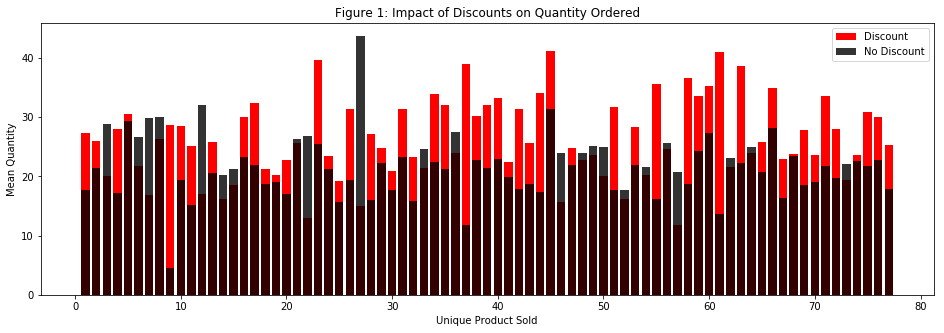

On roughly 70.0% of products with some sort of discount applied, a higher quantity was sold.
Average order quantity increase with discount ~ 4.599999999999998 items.


In [29]:
discount = orderdetaildf[orderdetaildf['Discount']!=0].groupby('ProductId')['Quantity'].mean()
no_discount = orderdetaildf[orderdetaildf['Discount']==0].groupby('ProductId')['Quantity'].mean()
plt.figure(figsize=(16,5))
plt.bar(discount.index, discount.values, alpha=1, label='Discount', color='red')
plt.bar(no_discount.index, no_discount.values, alpha=0.8, label='No Discount', color='black')
plt.legend()
plt.title('Figure 1: Impact of Discounts on Quantity Ordered')
plt.xlabel('Unique Product Sold')
plt.ylabel('Mean Quantity')
plt.show()

print("On roughly {}% of products with some sort of discount applied, a higher quantity was sold.".format(round(sum(discount.values > no_discount.values)/len(discount.values)*100),2))
print("Average order quantity increase with discount ~ {} items.".format(round(discount.values.mean(),1) - round(no_discount.values.mean(),1)))

#### Figure 1 shows us that on average customers buy 4.59 additional units when presented a discount compared to having no discount on the product.  The figure also shows us that roughly 70% of products with a discount lead to higher quantity sold.  This provides some intital evidence to support H1. Lets now run a T-Test to determine what the P-Value of quantity ordered with and without discounts.

In [30]:
no_discount = orderdetaildf[orderdetaildf['Discount'] == 0]
discount = orderdetaildf[orderdetaildf['Discount'] > 0]

p = stats.ttest_ind(no_discount.Quantity, discount.Quantity)[1]
p

1.1440924523215966e-10

#### Given our Alpha value of .05 , this P-Value is below our required threshhold which means we can reject H0 and accept H1.  This means to some degree we can confidently say that a discount on a product will lead to a higher quantity ordered.  Lets now look to determine at what levels the discount effects quanity the most. 

In [31]:
discount_levels = orderdetaildf['Discount'].unique()
discount_levels.sort()
print('Discount levels')
print(str(discount_levels))

Discount levels
[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.1  0.15 0.2  0.25]


In [32]:
grouped_discounts = orderdetaildf[orderdetaildf['Discount'] > 0]
grouped_discounts

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount
6,10250/51,10250,51,42.40,35,0.15
7,10250/65,10250,65,16.80,15,0.15
8,10251/22,10251,22,16.80,6,0.05
9,10251/57,10251,57,15.60,15,0.05
11,10252/20,10252,20,64.80,40,0.05
12,10252/33,10252,33,2.00,25,0.05
17,10254/24,10254,24,3.60,15,0.15
18,10254/55,10254,55,19.20,21,0.15
29,10258/2,10258,2,15.20,50,0.20
30,10258/5,10258,5,17.00,65,0.20


#### The above table shows us all orders that had some sort of discount applied to it.  Lets now get the value counts of each discount level.

In [33]:
grouped_discounts.Discount.value_counts()

0.05    185
0.10    173
0.20    161
0.15    157
0.25    154
0.03      3
0.02      2
0.04      1
0.06      1
0.01      1
Name: Discount, dtype: int64

#### The value counts for discount levels are relatively similar except for those at the 1%, 2%, 3%, 4% and 6% levels.  Lets group those into the 5% level to make the distribution more even across all discount levels.

In [34]:
grouped_discounts['Discount'] = grouped_discounts['Discount'].apply(lambda x: 0.05 if (x > 0) & (x < 0.10) else x)
grouped_discounts.Discount.value_counts()

0.05    193
0.10    173
0.20    161
0.15    157
0.25    154
Name: Discount, dtype: int64

#### With our newly grouped discounts, lets now take a look at some of the breakdowns of quantity bought, order price and discount price.

In [35]:
orderdetaildf['OrderPrice'] = orderdetaildf.Quantity * orderdetaildf.UnitPrice
orderdetaildf['DiscountPrice'] = orderdetaildf.OrderPrice * (1-orderdetaildf.Discount)
orderdetaildf.head(20)

,Id,OrderId,ProductId,UnitPrice,Quantity,Discount,OrderPrice,DiscountPrice
0,10248/11,10248,11,14.0,12,0.00,168.0,168.00
1,10248/42,10248,42,9.8,10,0.00,98.0,98.00
2,10248/72,10248,72,34.8,5,0.00,174.0,174.00
3,10249/14,10249,14,18.6,9,0.00,167.4,167.40
4,10249/51,10249,51,42.4,40,0.00,1696.0,1696.00
5,10250/41,10250,41,7.7,10,0.00,77.0,77.00
6,10250/51,10250,51,42.4,35,0.15,1484.0,1261.40
7,10250/65,10250,65,16.8,15,0.15,252.0,214.20
8,10251/22,10251,22,16.8,6,0.05,100.8,95.76
9,10251/57,10251,57,15.6,15,0.05,234.0,222.30


#### This shows some interesting initial relationships between quanitity purchased with and without discounting.  Its also helpful to see the price savings on bulk orders of products with a given level discount.  Lets now look into Cohen's D effect size to determine the significance of each of the 5 levels of discounting.

In [36]:
def CohenD(group1, group2):
    diff = group1.mean() - group2.mean()
    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()
    pool = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pool)
    
    return abs(d)

In [37]:
control = orderdetaildf[orderdetaildf['Discount']==0]['Quantity']
experimental = orderdetaildf[orderdetaildf['Discount']!=0]['Quantity']

t_stat, p = stats.ttest_ind(control, experimental)
d = CohenD(experimental, control)

print('Reject Null') if p < 0.025 else print('Failed to reject the Null')
print("Cohen's D:", d)

Reject Null
Cohen's D: 0.2862724481729283


In [38]:
discounts_significance_df = pd.DataFrame(columns=['Discount Level','H0','Cohens D'], index=None)

discounts = [0.05, 0.1, 0.15, 0.2, 0.25]
control = orderdetaildf[orderdetaildf['Discount']==0]['Quantity']
for i in discounts:
    experimental = orderdetaildf[orderdetaildf['Discount']==i]['Quantity']
    st, p = stats.ttest_ind(control, experimental)
    d = CohenD(experimental, control)
    discounts_significance_df = discounts_significance_df.append( { 'Discount Level' : str(i*100)+'%' , 'H0' : 'Reject' if p < 0.025 else 'Failed', 'Cohens D' : d } , ignore_index=True)    

print('Table 1:') 
discounts_significance_df

Table 1:


,Discount Level,H0,Cohens D
0,5.0%,Reject,0.346877
1,10.0%,Reject,0.195942
2,15.0%,Reject,0.372404
3,20.0%,Reject,0.300712
4,25.0%,Reject,0.366593


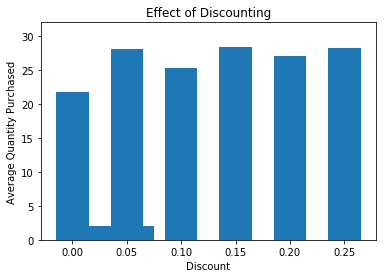

In [74]:
X = []
y = []
for i in orderdetaildf['Discount'].unique():
    X.append(i)
    y.append(orderdetaildf['Quantity'][orderdetaildf['Discount'] == i].mean())
ax = plt.bar(X,y,width=.03)
plt.ylim(0,32)
plt.ylabel('Average Quantity Purchased')
plt.xlabel('Discount')
plt.title('Effect of Discounting')
rects = ax.patches

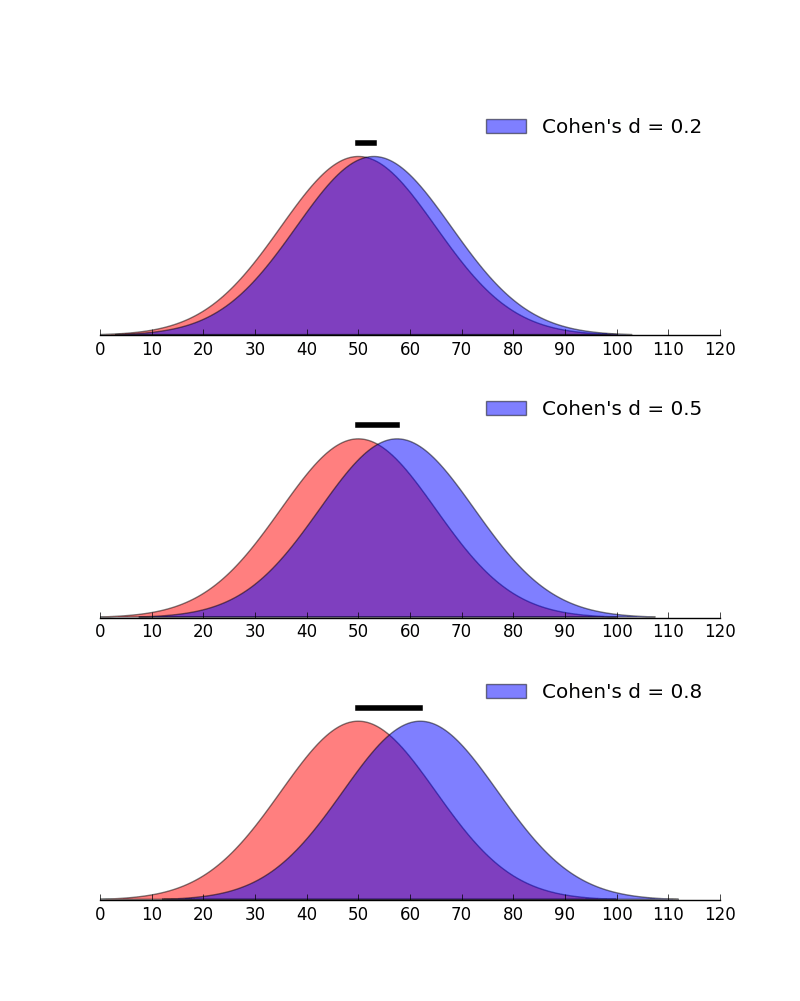

Image retrieved from: https://scientificallysound.org/2017/07/27/cohens-d-how-interpretation/

#### The data shown in Table 1 shows some that at all discount levels we still reject the Null Hypothesis, meaning that to some extent any sort of discounting will lead to a higher quantity of product purchased.  The Cohen's D value shows us the effect size of each level of discounting.  From the table we can infer:
##### - A discount of 15% will lead to the largest increase of quanitity purchased.  
##### - A discount of 25% will lead to the second largest increase in quantity.  
##### - A discount of 5% will lead to the third largest increase in quantity.
##### - A discount of 20% will lead to the fourth largest increase in quantity.
##### - A discount of 10% has the smallest effect size by 0.10477. 

# Question 2:
## Do certain products in different categories get discounted more than others?  

######     - H0 (Null Hypothesis) - There is no statistically significant difference in effect of discounting between categories.

######     - H1 (Alternative Hypothesis) - There is a statistically significant difference in the effect of discounting between categories.

##### Lets begin by querying our SQL database to get a table of quanitity purchases, discount level, and category id.

In [39]:
table_2 = pd.read_sql_query('''

                        SELECT OrderDetail.Quantity, Discount, CategoryId FROM OrderDetail
                        JOIN Product
                        ON OrderDetail.ProductId = Product.Id

''',conn)

In [40]:
print('Table 2:')
table_2.head(30)

Table 2:


,Quantity,Discount,CategoryId
0,12,0.00,4
1,10,0.00,5
2,5,0.00,4
3,9,0.00,7
4,40,0.00,7
5,10,0.00,8
6,35,0.15,7
7,15,0.15,2
8,6,0.05,5
9,15,0.05,5


##### In Question 1 we grouped together discount levels under 10% as 5% discount levels to make 5 closely distributed discount levels.  Lets do the same here.

In [42]:
grouped_discounts['Discount'] = grouped_discounts['Discount'].apply(lambda x: 0.05 if (x > 0) & (x < 0.10) else x)
grouped_discounts.Discount.value_counts()

0.05    193
0.10    173
0.20    161
0.15    157
0.25    154
Name: Discount, dtype: int64

In [43]:
#Lets remind ourselves what each CategoryID stands for. 
categorydf 

,Id,CategoryName,Description
0,1,Beverages,"Soft drinks, coffees, teas, beers, and ales"
1,2,Condiments,"Sweet and savory sauces, relishes, spreads, an..."
2,3,Confections,"Desserts, candies, and sweet breads"
3,4,Dairy Products,Cheeses
4,5,Grains/Cereals,"Breads, crackers, pasta, and cereal"
5,6,Meat/Poultry,Prepared meats
6,7,Produce,Dried fruit and bean curd
7,8,Seafood,Seaweed and fish


##### Lets run an ANOVA test to see if there are statistically significant differences in effect of discounting between categories.

In [44]:
anova = 'Discount ~ C(CategoryId)'
lm = ols(anova, table_2).fit()
table = sm.stats.anova_lm(lm, typ=2)
print('Table 2:')
print(table)

Table 2:
                  sum_sq      df         F    PR(>F)
C(CategoryId)   0.074918     7.0  1.539545  0.149326
Residual       14.925422  2147.0       NaN       NaN


##### The results of this ANOVA analysis show that we fail to reject H0.  The large F Ratio further signifies that we fail to reject the null hypothesis.  There is no significant differences in effect of discount between categories.

# Question 3
## Is there a statistically significant difference in the amount of sales with discounts originated from the United States or United Kingdom? 

######     - H0 (Null Hypothesis) - There is no statistically significant difference in the amount of sales with discounts originated from either the US or UK.

######     - H1 (Alternative Hypothesis) - There is a statistically significant difference in the effect of discounting between categories.

In [45]:
table3 = pd.read_sql_query('''

                    SELECT OD.Discount, E.Country FROM [Order] AS O
                    JOIN OrderDetail AS OD ON O.Id = OD.OrderId
                    JOIN Employee AS E ON O.EmployeeId = E.Id

''', conn)

In [46]:
table3.head(25) 

,Discount,Country
0,0.00,UK
1,0.00,UK
2,0.00,UK
3,0.00,UK
4,0.00,UK
5,0.00,USA
6,0.15,USA
7,0.15,USA
8,0.05,USA
9,0.05,USA


In [47]:
formula = 'Discount ~ C(Country)'
lm = ols(formula, table3).fit()
table = sm.stats.anova_lm(lm, typ=2)
print('Table 3:')
print(table)

Table 3:
               sum_sq      df         F    PR(>F)
C(Country)   0.067081     1.0  9.671415  0.001896
Residual    14.933259  2153.0       NaN       NaN


### The F-Ratio is very large, showing us that the Null hypthesis (H0) is false, therefore we reject the Null.  There is statistically significant differences in the amount of sales with discounts originated from the United States or United Kingdom.

# Question 4
##  Is there a statistically significant difference in discounts given by employees of different titles? 
######     - H0 (Null Hypothesis) - There is no statistically significant difference in the amount of discounts from employees of different titles.

######     - H1 (Alternative Hypothesis) - There is a statistically significant difference in the amount of discounts from employees of different titles.

In [55]:
employeedf

,Id,LastName,FirstName,Title,TitleOfCourtesy,BirthDate,HireDate,Address,City,Region,PostalCode,Country,HomePhone,Extension,Photo,Notes,ReportsTo,PhotoPath
0,1,Davolio,Nancy,Sales Representative,Ms.,1980-12-08,2024-05-01,507 - 20th Ave. E. Apt. 2A,Seattle,North America,98122,USA,(206) 555-9857,5467,None,Education includes a BA in psychology from Col...,2.0,http://accweb/emmployees/davolio.bmp
1,2,Fuller,Andrew,"Vice President, Sales",Dr.,1984-02-19,2024-08-14,908 W. Capital Way,Tacoma,North America,98401,USA,(206) 555-9482,3457,None,Andrew received his BTS commercial in 1974 and...,NaN,http://accweb/emmployees/fuller.bmp
2,3,Leverling,Janet,Sales Representative,Ms.,1995-08-30,2024-04-01,722 Moss Bay Blvd.,Kirkland,North America,98033,USA,(206) 555-3412,3355,None,Janet has a BS degree in chemistry from Boston...,2.0,http://accweb/emmployees/leverling.bmp
3,4,Peacock,Margaret,Sales Representative,Mrs.,1969-09-19,2025-05-03,4110 Old Redmond Rd.,Redmond,North America,98052,USA,(206) 555-8122,5176,None,Margaret holds a BA in English literature from...,2.0,http://accweb/emmployees/peacock.bmp
4,5,Buchanan,Steven,Sales Manager,Mr.,1987-03-04,2025-10-17,14 Garrett Hill,London,British Isles,SW1 8JR,UK,(71) 555-4848,3453,None,Steven Buchanan graduated from St. Andrews Uni...,2.0,http://accweb/emmployees/buchanan.bmp
5,6,Suyama,Michael,Sales Representative,Mr.,1995-07-02,2025-10-17,Coventry House Miner Rd.,London,British Isles,EC2 7JR,UK,(71) 555-7773,428,None,Michael is a graduate of Sussex University (MA...,5.0,http://accweb/emmployees/davolio.bmp
6,7,King,Robert,Sales Representative,Mr.,1992-05-29,2026-01-02,Edgeham Hollow Winchester Way,London,British Isles,RG1 9SP,UK,(71) 555-5598,465,None,Robert King served in the Peace Corps and trav...,5.0,http://accweb/emmployees/davolio.bmp
7,8,Callahan,Laura,Inside Sales Coordinator,Ms.,1990-01-09,2026-03-05,4726 - 11th Ave. N.E.,Seattle,North America,98105,USA,(206) 555-1189,2344,None,Laura received a BA in psychology from the Uni...,2.0,http://accweb/emmployees/davolio.bmp
8,9,Dodsworth,Anne,Sales Representative,Ms.,1998-01-27,2026-11-15,7 Houndstooth Rd.,London,British Isles,WG2 7LT,UK,(71) 555-4444,452,None,Anne has a BA degree in English from St. Lawre...,5.0,http://accweb/emmployees/davolio.bmp


In [56]:
table4 = pd.read_sql_query('''

                    SELECT OD.Discount, OD.Quantity, E.Title FROM [Order] AS O
                    JOIN OrderDetail AS OD ON O.Id = OD.OrderId
                    JOIN Employee AS E ON O.EmployeeId = E.Id

''', conn)

#### To properly test this hypothesis lets look into the different types of roles in the title column.

In [60]:
print(employeedf['Title'])

0        Sales Representative
1       Vice President, Sales
2        Sales Representative
3        Sales Representative
4               Sales Manager
5        Sales Representative
6        Sales Representative
7    Inside Sales Coordinator
8        Sales Representative
Name: Title, dtype: object


### Lets one-hot encode this list to convert this categorical variable into an integer. 

In [64]:
employeedf['Title'] = employeedf['Title'].map({'Sales Representative':0, 'Vice President, Sales':1,'Sales Manager':2, 'Inside Sales Coordinator':3})

In [65]:
formula2 = 'Discount ~ C(Title)'
lm = ols(formula2, table4).fit()
table2 = sm.stats.anova_lm(lm, typ=2)
print('Table 4:')
print(table2)

Table 4:
            sum_sq      df         F    PR(>F)
C(Title)   0.05192     3.0  2.490322  0.058602
Residual  14.94842  2151.0       NaN       NaN


### The F-Ratio is very large, showing us that the Null hypthesis (H0) is false, therefore we reject the Null.  There is a statistically significant difference in the amount of discounts from employees of different titles.

# Conclusions:

## Question 1 
#### - There is a statistically significant difference in the quantity ordered of discounted vs. non-discounted products.

## Question 2 
#### - There is no significant differences in effect of discount between categories.

## Question 3 
#### - There is statistically significant differences in the amount of sales with discounts originated from the United States or United Kingdom.

## Question 4
#### - There is a statistically significant difference in the amount of discounts from employees of different titles.



# Futher Steps:

##### - Look into what products dont sell and try applying a discount on them.
##### - Look deeper into what discounts are given to what products within a category.
##### - Find out why the UK employees are discounting more than the US employees.
##### - Do upper level employees have more authority to authorize discounts?  